# Data Analysis Steps  



## A. Loading Libraries and Reading the File:  
We opened the script with standard EDA libraries: pandas, numpy, matplotlib, and seaborn, and read the CSV file into a DataFrame. After reading, we printed the shape, list of columns, and the head of the table to get a quick overview of the structure and examples. The goal was to ensure the file loaded correctly and to familiarize ourselves with the variables before any modifications.


In [1]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the CSV (adjust path if needed)
df = pd.read_csv("CA_AV_Collision_2019-2024(in).csv")

# Quick look
print(df.shape)
print(df.columns)
df.head()


(646, 57)
Index(['Unnamed: 0', 'Manufacturers Name', 'Business Name', 'Date Of Accident',
       'Time Of Accident', 'AM', 'PM', 'Vehicle Year', 'Model', 'City',
       'County', 'Moving', 'Stopped In Traffic', 'Pedestrian Involved',
       'Bicyclist Involved', 'Other', 'Number Of Vehicles Involved',
       'Damage: None', 'Damage: Minor', 'Damage: Moderate', 'Damage: Major',
       'Model_2', 'Moving_2', 'Autonomous Mode', 'Conventional Mode',
       'Accident Detail Description', 'Weather A 1', 'Weather B 1',
       'Weather C 1', 'Weather D 1', 'Weather E 1', 'Weather F 1',
       'Weather G 1', 'Lighting A 1', 'Lighting B 1', 'Lighting C 1',
       'Lighting D 1', 'Lighting E 1', 'Roadway A 1', 'Roadway B 1',
       'Roadway C 1', 'Roadway D 1', 'Road Conditions A 1',
       'Road Conditions B 1', 'Road Conditions C 1', 'Road Conditions D 1',
       'Road Conditions E 1', 'Road Conditions F 1', 'Road Conditions G 1',
       'Road Conditions H 1', 'Latitude', 'Longitude', 'Narrow R

,Unnamed: 0,Manufacturers Name,Business Name,Date Of Accident,Time Of Accident,AM,PM,Vehicle Year,Model,City,...,Road Conditions F 1,Road Conditions G 1,Road Conditions H 1,Latitude,Longitude,Narrow Roadway,Parked Vehicles,Intersection,Struck by Others,Other Party
0,0,GM Cruise LLC,Cruise,1/7/2019,6:54,NaN,Yes,2019.0,Bolt,San Francisco,...,NaN,NaN,Yes,37.772500,-122.414700,-1,0,1,1,4
1,1,Aurora Innovation Inc,Aurora Innovation Inc,1/10/2019,2:52,NaN,Yes,2017.0,MKZ,San Francisco,...,NaN,NaN,Yes,37.779096,-122.392765,0,0,1,1,1
2,2,GM Cruise LLC,Cruise,1/10/2019,11:29,Yes,NaN,2019.0,Bolt,San Francisco,...,NaN,NaN,Yes,37.770820,-122.417464,0,0,1,1,1
3,3,Waymo LLC,Waymo LLC,1/26/2019,3:24,NaN,Yes,2017.0,Pacifica,Mountain View,...,NaN,NaN,Yes,37.389300,-122.078300,-1,0,1,1,1
4,4,Waymo LLC,Waymo LLC,2/6/2019,9:08,Yes,NaN,2017.0,Pacifica,Mountain View,...,NaN,NaN,Yes,37.405600,-122.077500,0,0,1,1,1


## B. Removing the First Column and Processing Dates and Times:  
We removed the first column (Unnamed) to clean up fields that were not relevant for the analysis. This simplifies the DataFrame and prevents confusion later.  

We created an auxiliary column Clock from the AM/PM fields, combined Date Of Accident, Time Of Accident, and Clock into a single string, and converted it to a datetime format. After conversion, we dropped the intermediate columns (datetime_str, Date Of Accident, Time Of Accident, AM, PM, Clock) and extracted useful features: Hour, DayOfWeek, Month. The goal was to generate time-based features useful for analyzing seasonality, peak hours, etc. Finally, we printed the new shape of the DataFrame.


In [2]:

# Drop the irrelevant columns
df.drop('Unnamed: 0', axis=1, inplace=True)

# Datetime and Time Preprocessing
df['Clock'] = np.where(df['AM'].notna(), 'AM', np.where(df['PM'].notna(), 'PM', None))
df['Time Of Accident'] = df['Time Of Accident'].astype(str).str.strip()
df['datetime_str'] = df['Date Of Accident'].astype(str) + ' ' + df['Time Of Accident'] + ' ' + df['Clock'].astype(str)
df['Accident_DateTime'] = pd.to_datetime(df['datetime_str'], format='%m/%d/%Y %I:%M %p', errors='coerce')

# Drop redundant columns
df.drop(['datetime_str', 'Date Of Accident', 'Time Of Accident', 'AM', 'PM', 'Clock'], axis=1, inplace=True)

# Extract datetime features
df['Hour'] = df['Accident_DateTime'].dt.hour
df['DayOfWeek'] = df['Accident_DateTime'].dt.day_name()
df['Month'] = df['Accident_DateTime'].dt.month_name()


# Display the final shape to confirm the columns were dropped
print(f"DataFrame shape after dropping redundant columns: {df.shape}")


DataFrame shape after dropping redundant columns: (646, 56)


## C. Handling Missing Values and Converting Boolean Columns:  
We identified a group of columns with yes/no logic (Moving, Stopped In Traffic, Autonomous Mode, Damage: Minor, as well as Weather/Lighting/Road columns) and converted their values to True/False based on 'yes' or 'no'. For the variables Vehicle Year, Number Of Vehicles Involved, Business Name, and County, we filled in the missing values. The goal was to generate correct data types and maintain consistency before performing calculations or modeling.  

We ran df.info and printed a summary of types and non-null counts — confirming there are 646 records and 56 columns after cleaning, with about 36 boolean columns, one properly formatted date column, and Hour/Day/Month features. This confirms that the preparation is complete and the dataset is ready for statistical and visual analysis.


In [5]:

# --- Missing Values Handling for Boolean-like Columns ---
# Identify columns with boolean-like 'Yes'/'No' logic
bool_cols = [
    'Moving', 'Stopped In Traffic', 'Pedestrian Involved', 'Bicyclist Involved', 'Other',
    'Damage: None', 'Damage: Minor', 'Damage: Moderate', 'Damage: Major',
    'Moving_2', 'Autonomous Mode', 'Conventional Mode'
]
weather_cols = [col for col in df.columns if col.startswith('Weather')]
lighting_cols = [col for col in df.columns if col.startswith('Lighting')]
road_cols = [col for col in df.columns if col.startswith('Roadway')]
cond_cols = [col for col in df.columns if col.startswith('Road Conditions')]

cols_to_fill = bool_cols + weather_cols + lighting_cols + road_cols + cond_cols
for col in cols_to_fill:
    if col in df.columns:  # Check if the column exists
        # Convert to boolean and fill NaNs
        df[col] = df[col].apply(lambda x: True if str(x).strip().lower() == 'yes' else False)

# Handle other specific missing values
df['Business Name'] = df['Business Name'].fillna('Unknown')
df['County'] = df['County'].fillna('Unknown')
df['Vehicle Year'] = df['Vehicle Year'].fillna(df['Vehicle Year'].mode()[0])
df['Number Of Vehicles Involved'] = pd.to_numeric(df['Number Of Vehicles Involved'], errors='coerce').fillna(df['Number Of Vehicles Involved'].mode()[0])

# Final check of the DataFrame structure and non-null counts
print("DataFrame info after full data preparation:")
df.info()

# Display the first 5 rows to see the new boolean values
print("\nFirst 5 rows of the cleaned DataFrame:")
print(df[['Moving', 'Stopped In Traffic', 'Autonomous Mode', 'Damage: Minor']].head())

DataFrame info after full data preparation:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Manufacturers Name           646 non-null    object        
 1   Business Name                646 non-null    object        
 2   Vehicle Year                 646 non-null    float64       
 3   Model                        645 non-null    object        
 4   City                         646 non-null    object        
 5   County                       646 non-null    object        
 6   Moving                       646 non-null    bool          
 7   Stopped In Traffic           646 non-null    bool          
 8   Pedestrian Involved          646 non-null    bool          
 9   Bicyclist Involved           646 non-null    bool          
 10  Other                        646 non-null    bool          
 11  N

## D. Checking the Number of Vehicles Involved in Accidents in Autonomous Mode:  
We ran basic counts - an output message indicating the number of accidents in autonomous mode. We also displayed the first few rows to check that the new features (boolean columns, hour) were as expected. The goal of this step is to understand the distribution between driving modes (Autonomous vs Conventional) and identify basic trends.

In [7]:

# --- 2. Filtering and Analysis ---
# Filter the DataFrame to only include accidents in Autonomous Mode
autonomous_df = df[df['Autonomous Mode'] == True].copy()
print(f"Number of accidents in Autonomous Mode: {autonomous_df.shape[0]}")

Number of accidents in Autonomous Mode: 358


## E. Plotting a Bar Chart of Accidents by Hour of the Day:  
We calculated the number of accidents for each hour of the day and displayed them in a bar chart. The chart includes a title and axis labels, with hours on the X-axis and the number of accidents on the Y-axis. This provides a clear view of the distribution of accidents throughout the day.


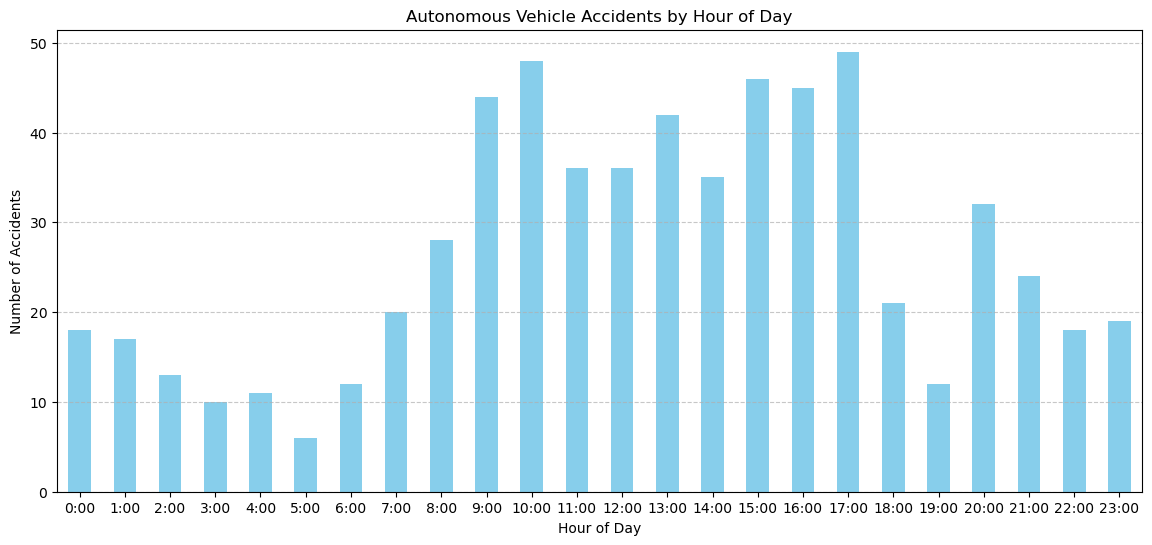

In [9]:

hourly_counts = df['Hour'].value_counts().sort_index()

plt.figure(figsize=(14, 6))
hourly_counts.plot(kind='bar', color='skyblue')
plt.title('Autonomous Vehicle Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.xticks(range(24), [f"{h}:00" for h in range(24)], rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

It can be concluded from this graph that most accidents in general occur during the day, but there are probably also more trips during the day, so this graph does not add much to us.

## F. Plotting a Bar Chart of Accidents by Day of the Week:  
We calculated the number of accidents for each day of the week and displayed them in a bar chart. The chart shows the days of the week on the X-axis and the number of accidents on the Y-axis, with an appropriate title and labels. Horizontal grid lines help compare between different days. This provides a clear view of the distribution of accidents across the week.


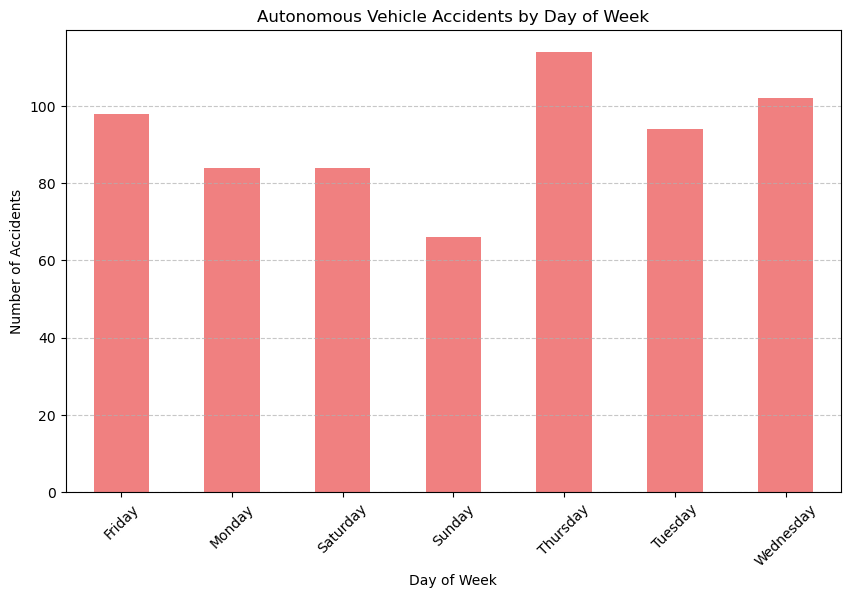

In [11]:
daily_counts = df['DayOfWeek'].value_counts().sort_index()
# Plotting accidents by day of the week
plt.figure(figsize=(10, 6))
daily_counts.plot(kind='bar', color='lightcoral')
plt.title('Autonomous Vehicle Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

It can be seen that except for Sunday (a day off when there is not much travel), the number of accidents each day is almost the same.

## G. Plotting a Bar Chart of Accidents by Weather Conditions:  
We created a new DataFrame that summarizes the number of accidents by weather conditions. First, we selected the columns describing weather conditions and counted the number of accidents for each. Then, we cleaned up the condition names for better readability. Finally, we displayed the information in a bar chart, with the X-axis showing the different weather conditions and the Y-axis showing the number of accidents for each condition.

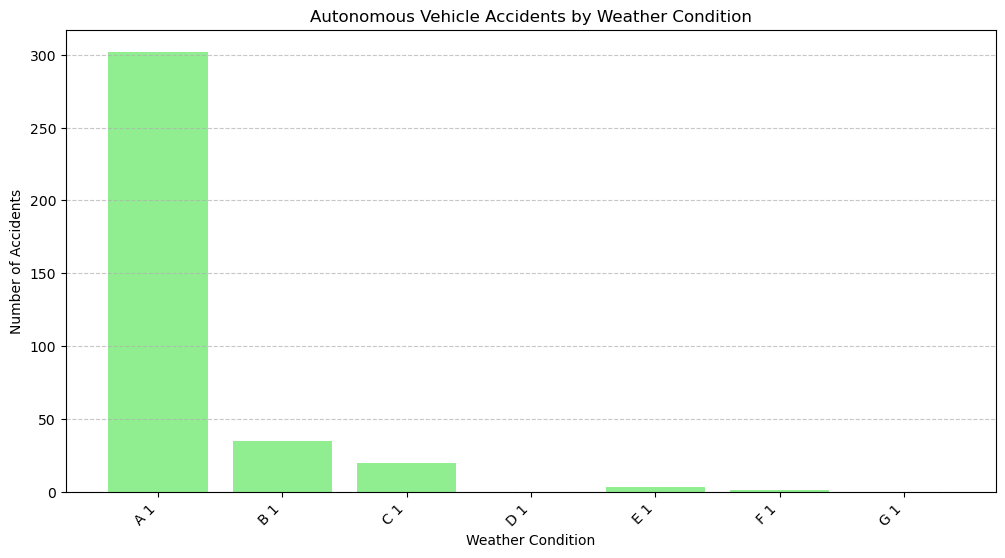

In [13]:

# Create a new DataFrame for weather conditions
weather_cols = [col for col in autonomous_df.columns if col.startswith('Weather') and any(col.endswith(str(i)) for i in range(1, 10))]
weather_counts = pd.DataFrame({'Condition': weather_cols, 'Accident Count': [autonomous_df[col].sum() for col in weather_cols]})
weather_counts['Condition'] = weather_counts['Condition'].apply(lambda x: x.replace('Weather ', ''))

# Plotting accidents by weather conditions
plt.figure(figsize=(12, 6))
plt.bar(weather_counts['Condition'], weather_counts['Accident Count'], color='lightgreen')
plt.title('Autonomous Vehicle Accidents by Weather Condition')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Most accidents occurred in weather condition A1, which means "Clear" ([source](https://github.com/xuyimingxym/CA-AV-Collision-Data/blob/main/README.md)). However, in California, the weather is mostly clear for the majority of the year.

## H. Geographic Analysis of Accidents by Location:  
We created a plot to visualize the distribution of accidents by geographic location. First, we grouped the data by latitude and longitude to determine how many accidents occurred at each location. Then, we displayed the information in a scatter plot, where each point represents the location of an accident. The size and color of the points indicate the number of accidents at that location, allowing us to identify hotspots with a high concentration of accidents.


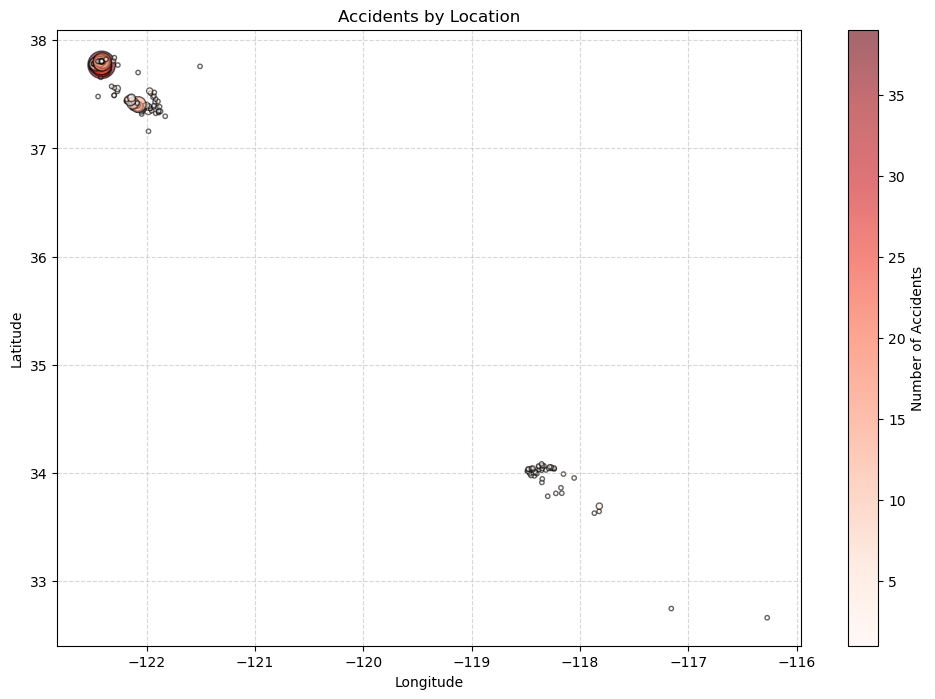

In [15]:

location_counts = df.groupby(['Latitude', 'Longitude']).size().reset_index(name='AccidentCount')

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    location_counts['Longitude'], 
    location_counts['Latitude'], 
    s=location_counts['AccidentCount']*10,  
    c=location_counts['AccidentCount'],   
    cmap='Reds', alpha=0.6, edgecolors='k'
)

plt.colorbar(scatter, label='Number of Accidents')
plt.title('Accidents by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

From the plot, it can be seen that the highest concentration of accidents occurs in specific areas, while some locations have only a few accidents. The output allows us to identify risk hotspots and analyze the relationship between geographic location and accident frequency in a clear and visual way.


## I. Checking the Vehicles with the Most Accidents in Autonomous Mode:  
In this step, we measured the number of accidents by vehicle type, considering only accidents in which the vehicle was in autonomous mode. We chose to display the vehicle types involved in the most accidents using a bar chart, visually showing the distribution of accidents among different manufacturers.

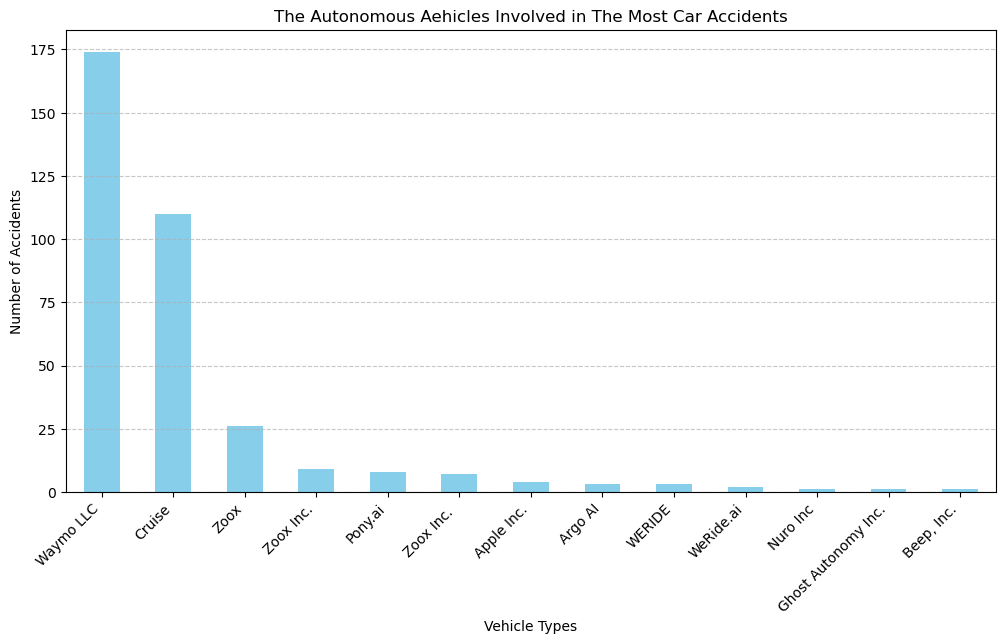

In [37]:
vehicle_counts = autonomous_df['Business Name'].value_counts().head(13)

plt.figure(figsize=(12, 6))
vehicle_counts.plot(kind='bar', color='skyblue')
plt.title('The Autonomous Aehicles Involved in The Most Car Accidents')
plt.xlabel('Vehicle Types')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

From the plot, we can see the 13 companies whose autonomous vehicles were involved in the most accidents. The results clearly show that **Waymo** leads by a large margin with over 170 accidents, followed by **Cruise** with more than 100 accidents, and then **Zoox** with about 25 accidents only. Other companies, such as Pony.ai, Apple Inc., and Argo AI, appear with significantly fewer accidents, at the level of a few cases each. In other words, most accidents are concentrated in two companies (Waymo and Cruise), while the remaining companies contribute relatively little to the total number of autonomous vehicle accidents.


## J. Comparing Accidents Between Autonomous and Conventional Modes:  
We created a comparison between accidents in vehicles when autonomous mode was active versus accidents in conventional driving mode. First, we split the data into two separate groups – autonomous mode and conventional mode. Then, we counted the number of accidents for each hour of the day and each day of the week for both groups. Finally, we built a comparative bar chart, showing side by side the number of accidents by hour of the day in both modes. This provides a visual illustration to understand the differences in accident patterns between autonomous and conventional vehicles.


In [270]:

# --- 2. Comparative Analysis ---
# Separate data into autonomous and conventional modes
autonomous_df = df[df['Autonomous Mode'] == True].copy()
conventional_df = df[df['Conventional Mode'] == True].copy()

# Count accidents by hour for both modes
hourly_counts_auto = autonomous_df['Hour'].value_counts().sort_index()
hourly_counts_conv = conventional_df['Hour'].value_counts().sort_index()

# Count accidents by day of week for both modes
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_counts_auto = autonomous_df['DayOfWeek'].value_counts().reindex(day_order)
daily_counts_conv = conventional_df['DayOfWeek'].value_counts().reindex(day_order)



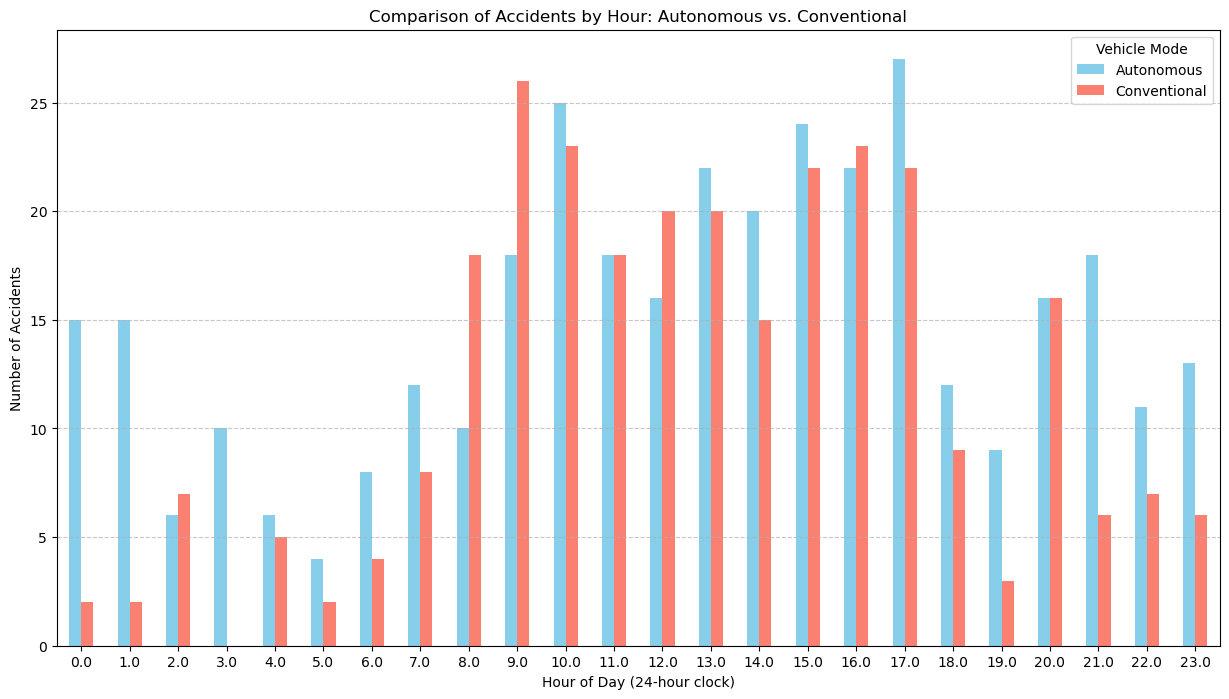

In [271]:

# Plotting side-by-side bar chart for hourly counts
hourly_df = pd.DataFrame({'Autonomous': hourly_counts_auto, 'Conventional': hourly_counts_conv}).fillna(0)
hourly_df.plot(kind='bar', figsize=(15, 8), color=['skyblue', 'salmon'])
plt.title('Comparison of Accidents by Hour: Autonomous vs. Conventional')
plt.xlabel('Hour of Day (24-hour clock)')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.legend(title='Vehicle Mode')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

While in autonomous and conventional modes the number of accidents peaks in the middle of the day, vehicles in autonomous mode suffer from a much higher accident count during off-peak hours (late night and early morning), especially between 9:00 PM and 7:00 AM. <br>
The reason why autonomous vehicles are involved in more accidents during these hours may be due to a combination of technological and environmental limitations. During these hours, lighting conditions are low and the systems have difficulty identifying objects, while strong light sources such as car headlights or street lights may confuse the sensors. In addition, the data bases on which the algorithms are based include fewer examples from the night, which makes it difficult to predict unexpected situations. Added to this are weather conditions unique to the night and early morning (fog, wet or damp roads), which increase the level of risk.

## K. Comparing Accidents by Day of the Week - Autonomous vs Conventional:  
We compared accidents in autonomous vehicles with those in conventional driving mode across the days of the week. First, we combined the data from both modes into a single dataset, so that each day of the week represents the number of accidents for both modes. Then, we displayed the information in a comparative bar chart, showing side by side the number of accidents in autonomous and conventional vehicles for each day. The chart makes it easy to identify differences and patterns between the two modes throughout the week.

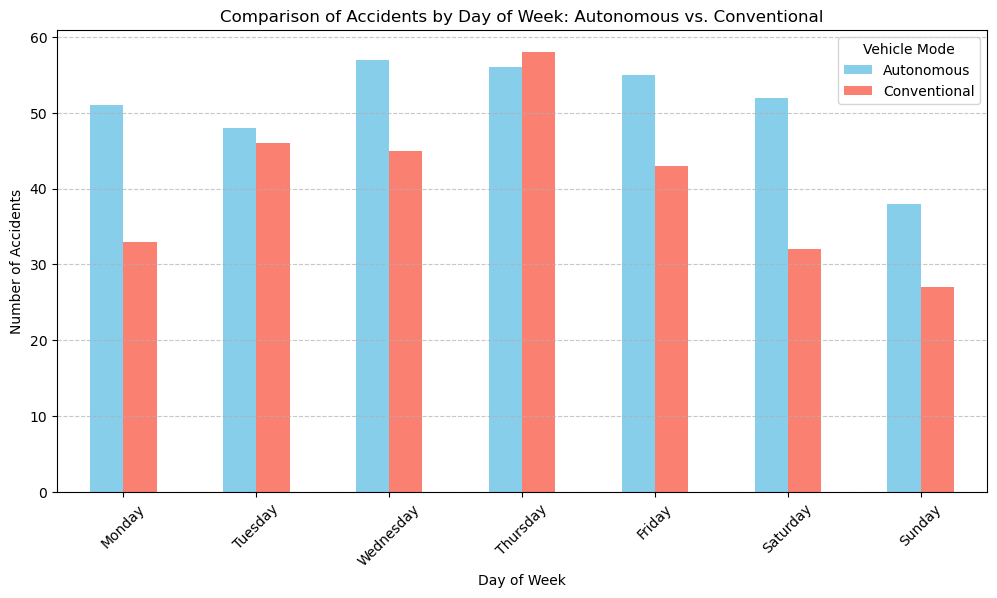

In [278]:

# Plotting side-by-side bar chart for daily counts
daily_df = pd.DataFrame({'Autonomous': daily_counts_auto, 'Conventional': daily_counts_conv}).fillna(0)
daily_df.plot(kind='bar', figsize=(12, 6), color=['skyblue', 'salmon'])
plt.title('Comparison of Accidents by Day of Week: Autonomous vs. Conventional')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.legend(title='Vehicle Mode')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

The most noticeable difference in the chart is the weekend pattern. Vehicles in autonomous mode maintain a relatively high accident rate on both Saturday and Sunday, while conventional vehicles experience a more significant decrease. The highest number of conventional vehicle accidents occurs on Thursday (58), while autonomous vehicle accidents peak on Wednesday (57).

## L. Comparing the Number of Accidents by Road Type - Autonomous vs Conventional:  
We examined how road type affects the number of accidents for vehicles in autonomous mode compared to conventional mode. We created a table calculating the number of accidents for each road type (interchange and narrow road) for both groups. Then, we displayed the data in a bar chart, allowing a direct comparison between the two groups for each road type.


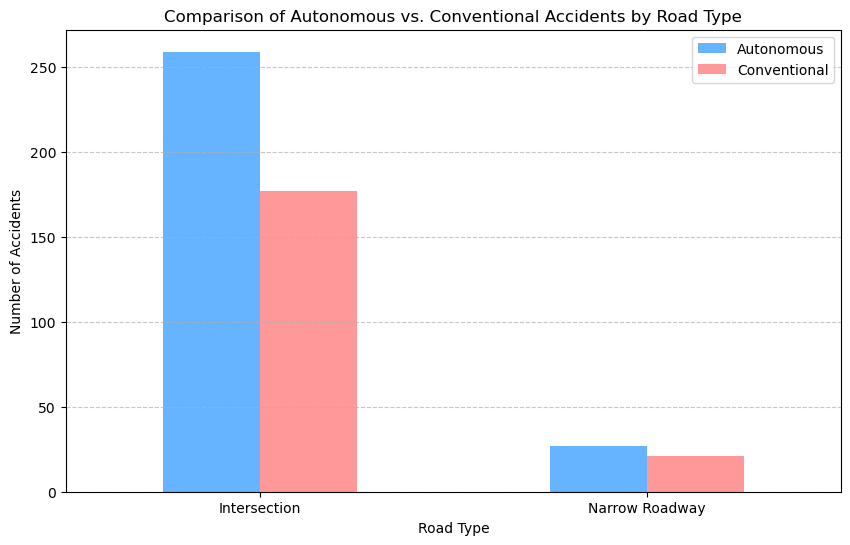

In [280]:

# Count accidents by road type for both groups
road_types = ['Intersection', 'Narrow Roadway']
road_data = {'Autonomous': [(autonomous_df[col] == True).sum() for col in road_types],
             'Conventional': [(conventional_df[col] == True).sum() for col in road_types]}
road_comparison = pd.DataFrame(road_data, index=road_types)

# Plotting the comparison by road type
road_comparison.plot(kind='bar', figsize=(10, 6), color=['#66b3ff', '#ff9999'])
plt.title('Comparison of Autonomous vs. Conventional Accidents by Road Type')
plt.xlabel('Road Type')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

It can be seen that autonomous vehicles suffer a significantly higher number of accidents at intersections (259) compared to conventional vehicles (177). <br>
The reason why autonomous vehicles have a higher number of accidents at intersections than conventional vehicles may be due to the complexity of the environment at the intersection and the difficulty of the algorithms in dealing with unexpected situations. At an intersection, multiple interactions occur simultaneously – pedestrians, cyclists, vehicles heading in different directions, and changing traffic lights – which requires fast and flexible decision-making. Autonomous systems have particular difficulty in recognizing the intentions of other road users and in dealing with “unwritten rules” that human drivers tend to adopt, such as mutual concessions or unexpected maneuvers. In addition, sensor errors or delays in processing information can lead to incorrect route calculations or delayed responses. Human drivers, on the other hand, also rely on body language and nonverbal cues from road users, which allows them to better mitigate risks at intersections. <br>
The data shows that autonomous vehicles had 27 accidents on narrow roads, a similar number to conventional vehicles (21). This finding suggests that narrow roads may not be a unique problem for autonomous vehicles.